Random Forest (RF) and Gradient Boosting (GB) classifiers Using Plurality Prediction Without FS

Accuracy: 0.8738532110091743
Precision: 0.9065114804431985
Recall: 0.6946346415029984
F1 Score: 0.7110969970547787
AUC: 0.8213784378644358
V Score: 0.8020739865974321


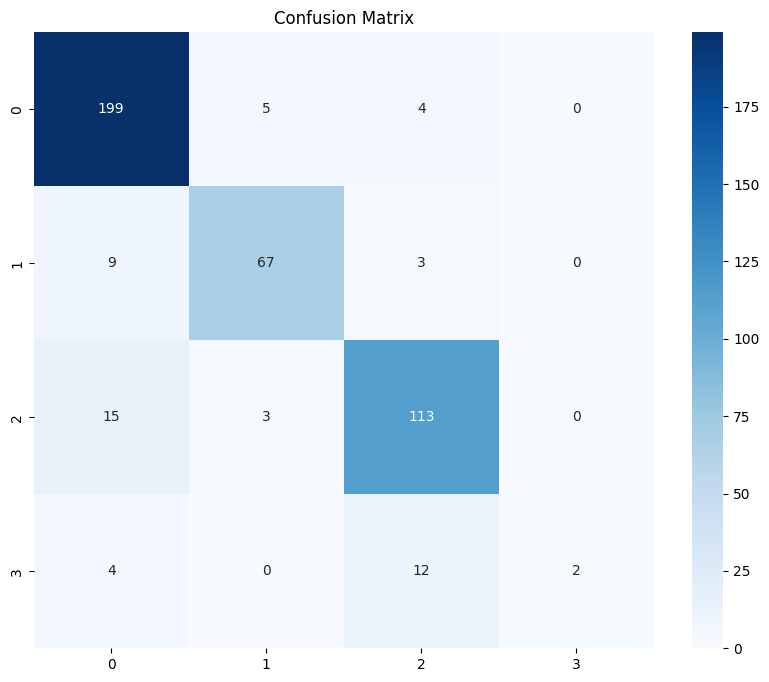

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score
from sklearn.impute import SimpleImputer

# Load the existing dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\Feature Selection\L1 Regularization\selected_dataset.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Gather additional data (assuming you have another dataset stored in 'additional_dataset.csv')
additional_dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\Feature Selection\L1 Regularization\dataset_NoPCA.csv'
additional_df = pd.read_csv(additional_dataset_path)
# Concatenate additional data with existing data
X = pd.concat([X, additional_df.drop('classification', axis=1)])
y = pd.concat([y, additional_df['classification']])

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with column mean
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the first classifier (Random Forest)
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(X_train, y_train)

# Train the second classifier (Gradient Boosting)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=42)
clf2.fit(X_train, y_train)

# Make predictions using both classifiers
pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)

# Combine predictions using plurality voting
combined_pred = np.array([max(set([pred1[i], pred2[i]]), key=list([pred1[i], pred2[i]]).count) for i in range(len(pred1))])

# Calculate accuracy, precision, recall, F1 score, AUC, and V score of the combined predictions
accuracy = accuracy_score(y_test, combined_pred)
precision = precision_score(y_test, combined_pred, average='macro')
recall = recall_score(y_test, combined_pred, average='macro')
f1 = f1_score(y_test, combined_pred, average='macro')
auc = roc_auc_score(pd.get_dummies(y_test).values, pd.get_dummies(combined_pred).values, multi_class='ovr')
v_score = matthews_corrcoef(y_test, combined_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("V Score:", v_score)

# Calculate and visualize the confusion matrix
confusion_matrix = confusion_matrix(y_test, combined_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()
